In [1]:
import cv2
import json
import numpy as np
import matplotlib.pyplot as plt

# Load image and bbox
image = cv2.imread("assets/face1.jpg")

In [2]:
import sys
sys.path.append("spiga")
from spiga.inference.config import ModelConfig
from spiga.inference.framework import SPIGAFramework
import copy
from spiga.demo.visualize.plotter import Plotter

In [3]:
from matplotlib import pyplot
from facenet_pytorch import MTCNN
# load image from file
filename = 'assets/face1.jpg'
pixels = pyplot.imread(filename)

/home/davidyao99/miniconda3/envs/image_morph/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
detector = MTCNN()

def get_bbox(img):
    
    box, _ = detector.detect(pixels)
    return box[0]

In [11]:
def get_keypoints(img):
    
    box = get_bbox(img)
    processor = SPIGAFramework(ModelConfig('wflw'))
    features = processor.inference(image, [box])
    
    x0,y0,w,h = box
    canvas = copy.deepcopy(image)
    landmarks = np.array(features['landmarks'][0])
    headpose = np.array(features['headpose'][0])
    
    print(landmarks.shape)

    # Plot features
    plotter = Plotter()
    canvas = plotter.landmarks.draw_landmarks(canvas, landmarks)
    
    # Show image results
    (h, w) = canvas.shape[:2]
    canvas = cv2.resize(canvas, (512, int(h*512/w)))
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

SPIGA model loaded!


/home/davidyao99/miniconda3/envs/image_morph/lib/python3.11/site-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/davidyao99/miniconda3/envs/image_morph/lib/python3.11/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


(98, 2)


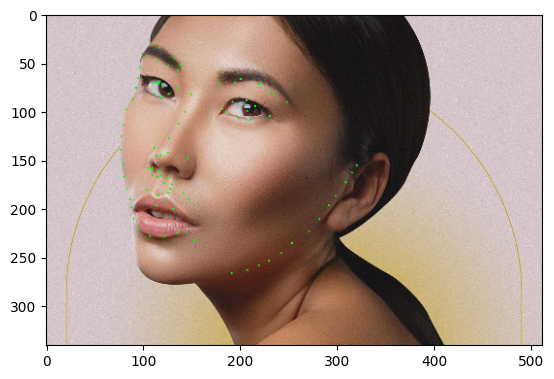

In [12]:
get_keypoints(image)